In [10]:
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_table('http://cs.joensuu.fi/sipu/datasets/spiral.txt',header=None, sep='\t')

In [12]:
data.head()

,0,1,2
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [13]:
import seaborn as sns

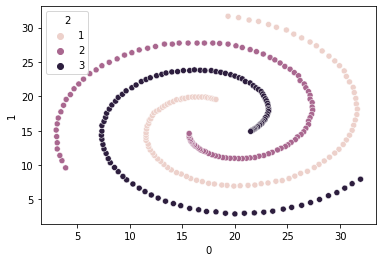

In [14]:
sns.scatterplot(data.iloc[:,0], data.iloc[:,1], hue=data.iloc[:,2])

In [15]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

In [16]:
scaled_data = StandardScaler().fit_transform(data.iloc[:,:2])

In [17]:
dist_mat = pairwise_distances(scaled_data)

Rule of thumb: If there are k points then MinPts=k+1

Epsilon can be determined by looking at the histogram

---



In [18]:
import matplotlib.pyplot as plt

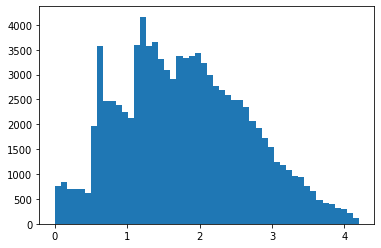

In [21]:
h = plt.hist(dist_mat.flatten(), bins = 50)

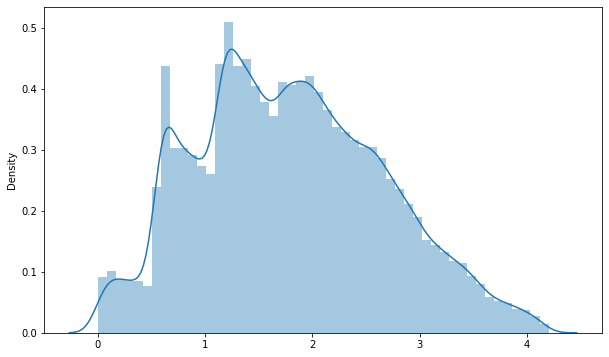

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(dist_mat.flatten())

In [24]:
#kde = Kernel density estimation
from scipy.stats import gaussian_kde
import numpy as np

In [25]:
kde = gaussian_kde(dist_mat.flatten())

In [28]:
input_array = np.linspace(start=0, stop=0.3, num=300)

In [29]:
density_vals = kde(input_array)

In [31]:
eps = input_array[density_vals == max(density_vals)]
eps

array([0.19464883])

In [32]:
pts = (dist_mat<=eps).sum(axis=0)

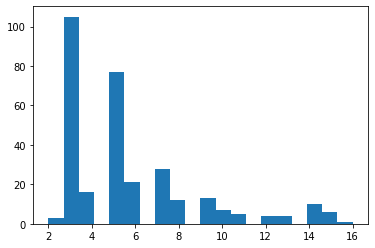

In [33]:
h = plt.hist(pts, bins=20)

In [34]:
minpts=2

In [35]:
from sklearn.cluster import DBSCAN, OPTICS

In [36]:
dbs = DBSCAN(eps=eps[0], min_samples=minpts)

In [37]:
dbs_cluster = dbs.fit_predict(scaled_data)

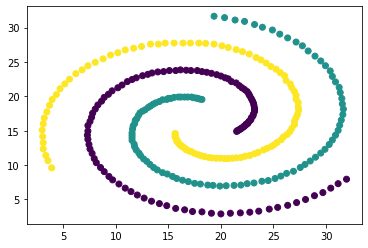

In [38]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=dbs_cluster)